In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df = pd.read_excel("A01615309_Actividad2_Registro-1.xlsx")

print("Primeras filas:")
display(df.head())

print("\nDescripción:")
display(df.describe(include='all'))

Primeras filas:


,Número,Fecha (dd/mm/aa),Nombre actividad,Costo,Presupuesto,Tiempo invertido,Tipo,Momento,No. de personas
0,1,2025-08-19,Agua,30.0,25.0,4 min,Alimentos,mañana,1.0
1,2,2025-08-20,Skittles,35.0,40.0,4 min,Alimentos,mañana,1.0
2,3,2025-08-21,Hamburguesa,195.0,210.0,45 min,Alimentos,Tarde,1.0
3,4,2025-08-22,Little Ceasars,140.0,150.0,25 min,Alimentos,Noche,1.0
4,5,2025-08-23,Starbucks,165.0,200.0,20 min,Alimentos,mañana,1.0



Descripción:


,Número,Fecha (dd/mm/aa),Nombre actividad,Costo,Presupuesto,Tiempo invertido,Tipo,Momento,No. de personas
count,300.000000,65,65,65.000000,65.000000,65,65,65,65.000000
unique,NaN,NaN,14,NaN,NaN,17,2,3,NaN
top,NaN,NaN,Agua,NaN,NaN,2 min,Alimentos,mañana,NaN
freq,NaN,NaN,32,NaN,NaN,10,64,41,NaN
mean,150.500000,2025-09-19 07:23:04.615384576,NaN,74.292308,78.846154,NaN,NaN,NaN,1.507692
min,1.000000,2025-08-19 00:00:00,NaN,20.000000,25.000000,NaN,NaN,NaN,1.000000
25%,75.750000,2025-09-04 00:00:00,NaN,30.000000,30.000000,NaN,NaN,NaN,1.000000
50%,150.500000,2025-09-20 00:00:00,NaN,30.000000,30.000000,NaN,NaN,NaN,1.000000
75%,225.250000,2025-10-03 00:00:00,NaN,35.000000,40.000000,NaN,NaN,NaN,2.000000
max,300.000000,2025-10-20 00:00:00,NaN,1000.000000,1200.000000,NaN,NaN,NaN,3.000000


In [ ]:
import pandas as pd

df = pd.read_excel("A01615309_Actividad2_Registro-1.xlsx")

df["Fecha (dd/mm/aa)"] = pd.to_datetime(df["Fecha (dd/mm/aa)"])
df["Año"] = df["Fecha (dd/mm/aa)"].dt.year
df["Mes"] = df["Fecha (dd/mm/aa)"].dt.month
df["Dia"] = df["Fecha (dd/mm/aa)"].dt.day
df["Dia_semana"] = df["Fecha (dd/mm/aa)"].dt.dayofweek

df["Tiempo invertido"] = df["Tiempo invertido"].str.replace(" min", "").astype(float)

df = pd.get_dummies(df, columns=["Nombre actividad","Tipo","Momento"], drop_first=True)

df = df.drop(["Número","Fecha (dd/mm/aa)"], axis=1)

df.dropna(subset=['Costo'], inplace=True)

X = df.drop("Costo", axis=1)
y = df["Costo"]

In [29]:
df["Costo"] = pd.to_numeric(df["Costo"], errors="coerce")
df = df.dropna(subset=["Costo"])

In [ ]:
X = df.drop("Costo", axis=1)
y = df["Costo"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = DecisionTreeRegressor(max_depth=5, random_state=42)
modelo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [ ]:
pred = modelo.predict(X_test)

mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 1.5384615384615385
RMSE: 4.385290096535146
R²: 0.4036697247706421


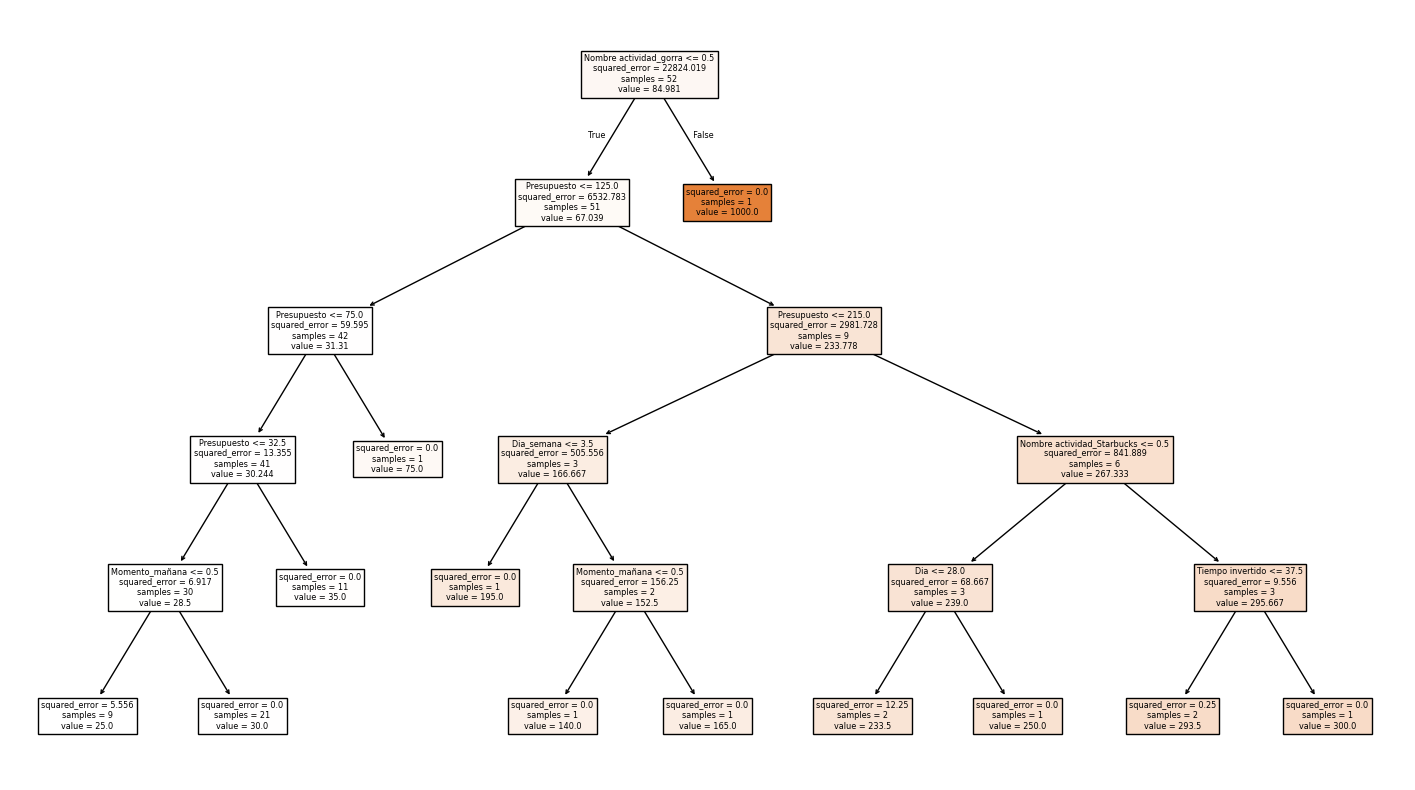

In [ ]:
plt.figure(figsize=(18,10))
plot_tree(modelo, feature_names=X.columns, filled=True)
plt.show()

In [ ]:
costo_mensual = df["Costo"].mean() * 30
print(f"Costo mensual estimado: ${costo_mensual:.2f}")

Costo mensual estimado: $2228.77


In [ ]:
df.to_excel('A01615309_Actividad2_Registro-1-2.xlsx',index=False)